# Analysis experiment 1

In [27]:
import hyperimp.evaluate.default_params as hyperimp
import pandas as pd
from scipy.io import arff
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
# load data
svm = pd.DataFrame(arff.loadarff('01 data/exp1/meta_svm.arff')[0])
rf = pd.DataFrame(arff.loadarff('01 data/exp1/meta_rf.arff')[0])

In [29]:
# algorithms to be evaluated
alg_names = ['rf', 'svm']
# hyperparameters to be evaluated
alg_params = {'svm': ['gamma','C','tol'
                     #, 'shrinking'
                     ],
              'rf': ['bootstrap', 'criterion', 'max_features','min_samples_leaf','min_samples_split']}
# parameters defined on a log and integer scale
logs = ['gamma', 'C', 'tol']
integer = ['min_samples_leaf', 'min_samples_split']
boolnom = ['bootstrap', 'criterion'
        #  , 'shrinking'
          ]

## Distribution of top _n_ per hyperparameter

In [36]:
n = 10
m = 50

# initialze alg objects
algs = hyperimp.init_algs('hyperimp/evaluate/parameters.csv', {'svm': svm, 'rf': rf})
# get top n data
dfs = [hyperimp.get_topn(alg, n, m, False) for alg in algs]

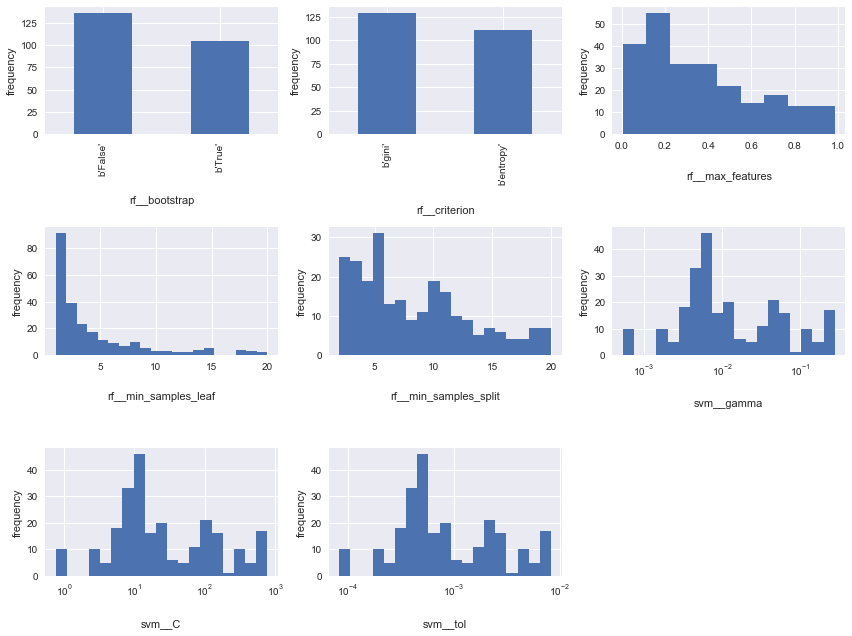

In [37]:
grid = True # put images on grid or not
cols = 3 # set nr columns in figure grid
ymax = None # set upper limit of plot; None for auto

if grid:
    nr_plots = sum([len(value) for key, value in alg_params.items()])
    rows = math.ceil(sum([len(value) for key, value in alg_params.items()])/cols)
    plt.figure(figsize = (4*cols,3*rows))
    index = 0

for alg, df in zip(alg_names, dfs):
    for param in alg_params[alg]:
        if grid:
            index += 1
            plt.subplot(rows, cols, index)
        if param in boolnom:
            df[param].value_counts().plot(kind='bar', color = sns.color_palette()[0])
        else:
            bins = 'auto'
            log = param in logs
            intg = param in integer
            if log:
                bins = np.logspace(np.log10(min(df[param])), np.log10(max(df[param])), 20)
                plt.xscale('log')
            if intg:
                bins = int(max(df[param]) - min(df[param]) + 1)
            plt.hist(df[param], bins = bins)
        plt.xlabel('%s__%s' % (alg, param), labelpad=20)
        plt.ylim(0,ymax)
        plt.ylabel('frequency')
        plt.tight_layout()
        if not grid:
            #plt.savefig('figures/histograms/hist__%s__%s.eps' % (alg, param), format = 'eps')
            plt.show()
if grid:
    plt.show()

## Default parameters

In [39]:
n = 10
m = 899

for alg in algs:
    def_params = hyperimp.find_default(alg, n, m, False)
    display(pd.DataFrame(def_params).transpose())

,bootstrap,criterion,max_features,min_samples_leaf,min_samples_split
3.0,"([b'False'], [b'False'], [b'False'])","([b'gini'], [b'gini'], [b'gini'])","(0.10435957249654193, 0.20219954205793367, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
6.0,"([b'False'], [b'False'], [b'False'])","([b'gini'], [b'gini'], [b'gini'])","(0.11523068022558546, 0.22394175751602072, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
11.0,"([b'False'], [b'False'], [b'False'])","([b'gini'], [b'gini'], [b'gini'])","(0.11523068022558546, 0.22394175751602072, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
12.0,"([b'False'], [b'False'], [b'False'])","([b'gini'], [b'gini'], [b'gini'])","(0.12026105990311985, 0.2283433397338633, 0.17...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
14.0,"([b'False'], [b'False'], [b'False'])","([b'gini'], [b'gini'], [b'gini'])","(0.11523068022558546, 0.22394175751602072, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
15.0,"([b'False'], [b'False'], [b'False'])","([b'gini'], [b'gini'], [b'gini'])","(0.11523068022558546, 0.22394175751602072, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
16.0,"([b'False'], [b'False'], [b'False'])","([b'gini'], [b'gini'], [b'gini'])","(0.11523068022558546, 0.22394175751602072, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
18.0,"([b'False'], [b'False'], [b'False'])","([b'gini'], [b'gini'], [b'gini'])","(0.10435957249654193, 0.20219954205793367, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
22.0,"([b'False'], [b'False'], [b'False'])","([b'gini'], [b'gini'], [b'gini'])","(0.11523068022558546, 0.22394175751602072, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
23.0,"([b'False'], [b'False'], [b'False'])","([b'gini'], [b'gini'], [b'gini'])","(0.10435957249654193, 0.20219954205793367, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"


KeyError: 'shrinking'